In [14]:
import re
import matplotlib.pyplot as plt

def extract_losses_from_log(filepath):
    """
    从日志文件中提取 loss 值
    """
    loss_list = []
    with open(filepath, 'r') as f:
        for line in f:
            match = re.search(r'loss=([\d\.]+)', line)
            if match:
                loss = float(match.group(1))
                loss_list.append(loss)
    return loss_list

def plot_loss(
    loss_list,
    title="Training Loss Curve",
    interval=10,
    vision_model=None,
    connector=None,
    language_model=None
):
    """
    绘制 loss 曲线图（支持按间隔采样和动态模型命名）

    Args:
        loss_list (List[float]): 所有 loss 值
        title (str): 主标题
        interval (int): 每隔多少步取一个点
        vision_model (str): 视觉编码器名称（可选）
        connector (str): 连接器名称（可选）
        language_model (str): 语言模型名称（可选）
    """
    # 每隔 interval 取一次
    sampled_indices = range(0, len(loss_list), interval)
    sampled_losses = [loss_list[i] for i in sampled_indices]

    # 构造动态标题
    model_info = []
    if vision_model:
        model_info.append(vision_model)
    if connector:
        model_info.append(connector)
    if language_model:
        model_info.append(language_model)
    model_str = " + ".join(model_info)
    full_title = f"{title} ({model_str})" if model_info else title

    # 绘图
    plt.figure(figsize=(10, 5))
    plt.plot(sampled_indices, sampled_losses, label=f'Loss (every {interval} steps)', color='blue')
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title(full_title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [15]:
import os
import re

def extract_model_names_from_path(filepath):
    """
    从 .out 文件路径中提取 vision_model、connector、language_model 名称

    Args:
        filepath (str): 完整的 .out 文件路径
    Returns:
        Tuple[str, str, str]: (vision_model, connector, language_model)
    """
    # 取文件名部分，不含路径
    filename = os.path.basename(filepath)

    # 用正则匹配模型名部分，例如 VLM.47945vit_mlp_gpt2.out
    match = re.search(r'VLM\.\d+([a-zA-Z0-9]+)_([a-zA-Z0-9]+)_([a-zA-Z0-9]+)\.out', filename)
    if match:
        vision_model = match.group(1)
        connector = match.group(2)
        language_model = match.group(3)
        return vision_model, connector, language_model
    else:
        raise ValueError(f"无法从路径中解析模型名: {filename}")


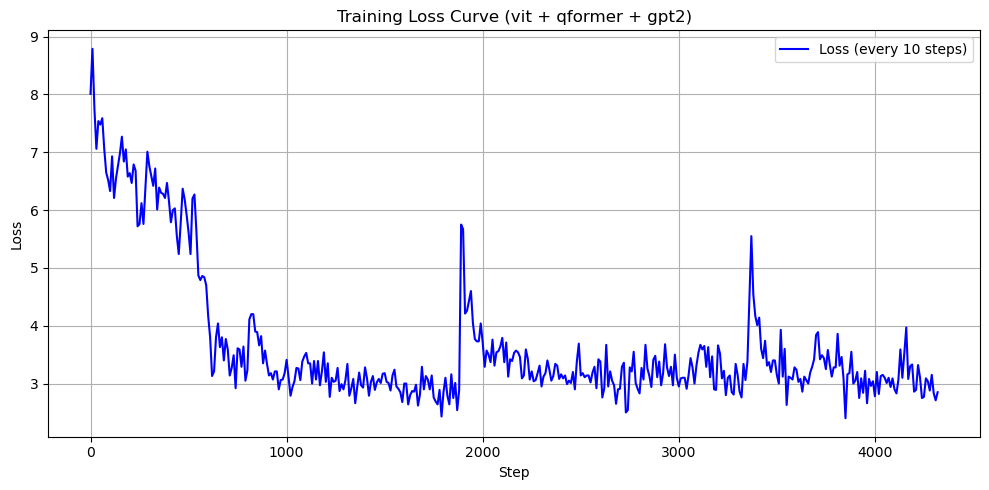

In [16]:
log_file = "/lab/haoq_lab/cse12310520/CV-Project/CV-Project-Image-Captioning/logs/VLM.47947vit_qformer_gpt2.out"

losses = extract_losses_from_log(log_file)
vision_model, connector, language_model = extract_model_names_from_path(log_file)

plot_loss(losses,vision_model=vision_model,connector=connector,language_model=language_model)